
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

In [115]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Задание 1.1

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [5]:
data = pd.read_csv('shopping_trends_updated.csv')
df = data.copy()

In [6]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [34]:
df.shape

(3900, 19)

In [33]:
df['Customer ID'].nunique()

3900

Кол-во уникальных клиентов совпадает с кол-вом строк - то есть каждая новая строка - новый клиент. Столбец Previous Purchases не дублирует уже имеющуюся в других строках информацию .


In [7]:
df.describe().applymap(lambda x: f"{x:.2f}")[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

Age Purchase Amount (USD) Review Rating Previous Purchases
count  3900.00               3900.00       3900.00            3900.00
mean     44.07                 59.76          3.75              25.35
std      15.21                 23.69          0.72              14.45
min      18.00                 20.00          2.50               1.00
25%      31.00                 39.00          3.10              13.00
50%      44.00                 60.00          3.70              25.00
75%      57.00                 81.00          4.40              38.00
max      70.00                100.00          5.00              50.00

In [8]:
df.describe(include=['object'])

Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases  
count            3900                   3900  
unique              6                      7  
top            PayPal         Every 3 Months  
freq              677                    584

In [9]:
(df['Category'].value_counts(normalize=True)*100).reset_index()

Category  proportion
0     Clothing   44.538462
1  Accessories   31.794872
2     Footwear   15.358974
3    Outerwear    8.307692

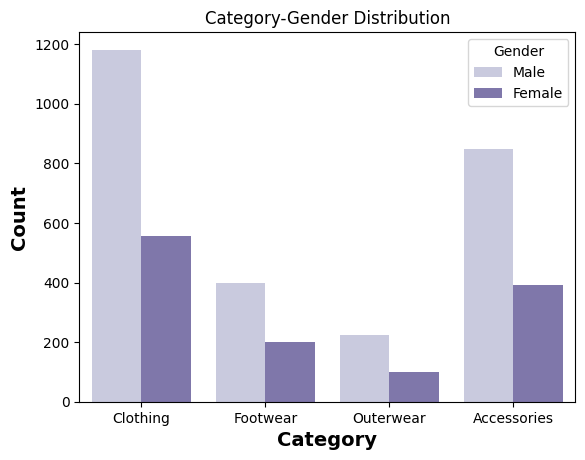

In [10]:
sns.countplot(
    x='Category',
    data=df,
    palette='Purples',
   hue='Gender');

plt.xlabel('Category',weight = 'bold', fontsize=14)
plt.ylabel('Count',weight = 'bold', fontsize=14)
plt.title('Category-Gender Distribution')
plt.show()

Первично взглянув на данные, можно определить, что клиенты-мужчины составляют две трети всех клиентов магазина.

Средний возраст всех клиентов - 44 года.

Средняя сумма покупки - 60 долларов.

Две трети клиентов - не пользуются подпиской.

Самая популярная категория товаров - одежда.

### Просмотр данных

In [37]:
(df['Shipping Type'].value_counts(normalize=True)*100).reset_index()

Shipping Type  proportion
0   Free Shipping   17.307692
1        Standard   16.769231
2    Store Pickup   16.666667
3    Next Day Air   16.615385
4         Express   16.564103
5  2-Day Shipping   16.076923

In [38]:
(df['Frequency of Purchases'].value_counts(normalize=True)*100).reset_index()

Frequency of Purchases  proportion
0         Every 3 Months   14.974359
1               Annually   14.666667
2              Quarterly   14.435897
3                Monthly   14.179487
4              Bi-Weekly   14.025641
5            Fortnightly   13.897436
6                 Weekly   13.820513

In [39]:
(df['Item Purchased'].value_counts(normalize=True)*100).reset_index()

Item Purchased  proportion
0          Blouse    4.384615
1           Pants    4.384615
2         Jewelry    4.384615
3           Shirt    4.333333
4           Dress    4.256410
5         Sweater    4.205128
6          Jacket    4.179487
7            Coat    4.128205
8      Sunglasses    4.128205
9            Belt    4.128205
10        Sandals    4.102564
11          Socks    4.076923
12          Skirt    4.051282
13          Scarf    4.025641
14         Shorts    4.025641
15            Hat    3.948718
16        Handbag    3.923077
17         Hoodie    3.871795
18          Shoes    3.846154
19        T-shirt    3.769231
20       Sneakers    3.717949
21          Boots    3.692308
22       Backpack    3.666667
23         Gloves    3.589744
24          Jeans    3.179487

In [40]:
(df['Item Purchased'].value_counts(normalize=True)*100).reset_index()

Item Purchased  proportion
0          Blouse    4.384615
1           Pants    4.384615
2         Jewelry    4.384615
3           Shirt    4.333333
4           Dress    4.256410
5         Sweater    4.205128
6          Jacket    4.179487
7            Coat    4.128205
8      Sunglasses    4.128205
9            Belt    4.128205
10        Sandals    4.102564
11          Socks    4.076923
12          Skirt    4.051282
13          Scarf    4.025641
14         Shorts    4.025641
15            Hat    3.948718
16        Handbag    3.923077
17         Hoodie    3.871795
18          Shoes    3.846154
19        T-shirt    3.769231
20       Sneakers    3.717949
21          Boots    3.692308
22       Backpack    3.666667
23         Gloves    3.589744
24          Jeans    3.179487

In [41]:
df.isna().any()

Customer ID               False
Age                       False
Gender                    False
Item Purchased            False
Category                  False
Purchase Amount (USD)     False
Location                  False
Size                      False
Color                     False
Season                    False
Review Rating             False
Subscription Status       False
Shipping Type             False
Discount Applied          False
Promo Code Used           False
Previous Purchases        False
Payment Method            False
Frequency of Purchases    False
Age_Type                   True
dtype: bool

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   object  
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   object  
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

### Гипотеза: Женщины моложе 35 заказывают чаще женщин старшего возраста

Разделим всех клиентов на три возрастыне группы: моложе 35, от 36 до 55 и старше 56

In [24]:
df['Age_Type'] = pd.cut(df['Age'], bins=[18, 35, 55, 100],labels=['Adult', 'Middle Age Adult', 'Senior Adult'])

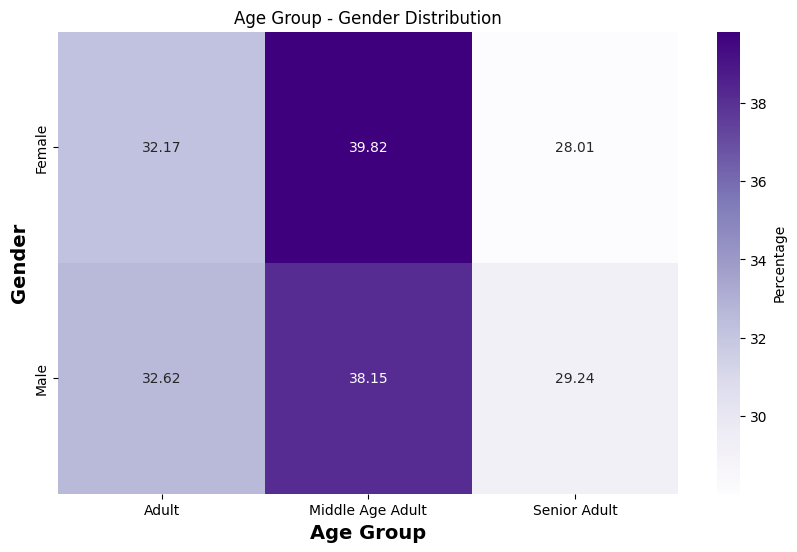

In [25]:
pivot_table = df.pivot_table(
    index = 'Gender',
    columns = 'Age_Type',
    values = 'Customer ID',
    aggfunc = 'count')

percent = pivot_table.div(pivot_table.sum(axis=1), axis=0)*100

plt.figure(figsize = (10,6))
sns.heatmap(percent, annot=True, cmap = 'Purples', fmt ='.2f', cbar_kws={'label':'Percentage'})
plt.xlabel('Age Group',weight = 'bold', fontsize=14)
plt.ylabel('Gender',weight = 'bold', fontsize=14)
plt.title('Age Group - Gender Distribution')
plt.xticks(rotation=0)
plt.show()

Гипотеза о том, что женщины до 35 лет заказывают чаще не подтвердилась. Чаще всего заказывают женщины и мужчщины в возрасте от 36 до 55. Кроме того, зная, что мужчины составляют бОльшую часть всех клиентов, можно сделать вывод о том, что 

самая крупная группа всех покупателей - Мужчины в возрасте от 36 до 55.


### Гипотеза: Люди среднего возраста в среднем совершают более дорогие покупки

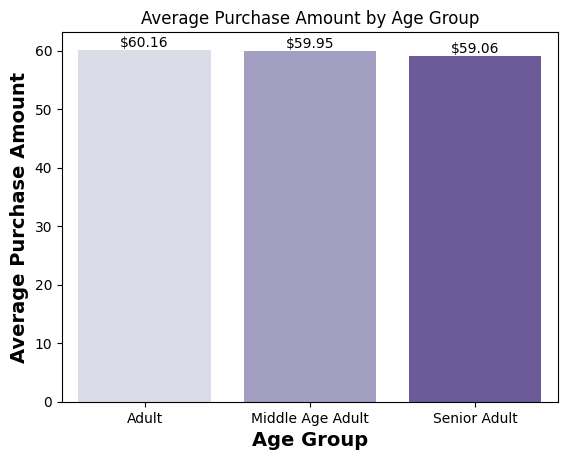

In [64]:
age_means = df.groupby("Age_Type")["Purchase Amount (USD)"].mean()
sns.barplot(age_means, palette='Purples')

for index, value in enumerate(age_means):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Age Group',weight = 'bold', fontsize=14)
plt.ylabel('Average Purchase Amount',weight = 'bold', fontsize=14)
plt.title('Average Purchase Amount by Age Group')
plt.show()

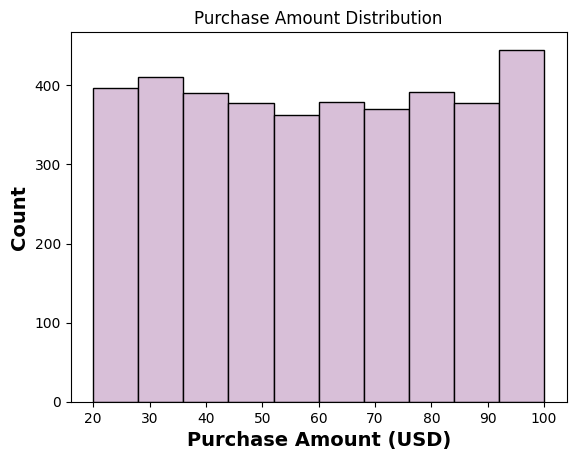

In [145]:
plt.hist(df['Purchase Amount (USD)'], edgecolor = "black", color='thistle')
plt.xlabel('Purchase Amount (USD)',weight = 'bold', fontsize=14)
plt.ylabel('Count',weight = 'bold', fontsize=14)
plt.title('Purchase Amount Distribution')
plt.show()


Гипотеза о том, что в среднем сумма покупки у клиентов среднего возраста, не подтвердилась, однако разница с наибольшим значением очень мала. 
Кроме того, распределение параметра сумма покупки близко к равномерному. Поэтому средняя сумма покупок всех возрастных групп близка к 60 долларам, что также является средним всей выборки.

### Гипотеза: Клиенты среднего возраста ранее совершили суммарно больше покупок, чем другие возрастные группы

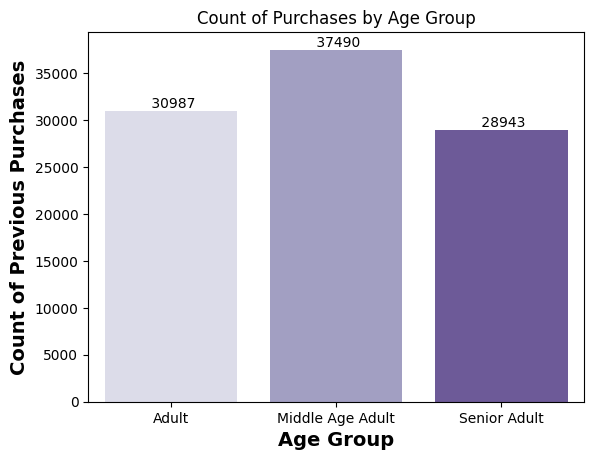

In [72]:
prev_purch_sum = df.groupby('Age_Type')['Previous Purchases'].sum()
sns.barplot(prev_purch_sum, palette='Purples')

for index, value in enumerate(prev_purch_sum):
    plt.text(index, value, f'{value: .0f}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Age Group',weight = 'bold', fontsize=14)
plt.ylabel('Count of Previous Purchases',weight = 'bold', fontsize=14)
plt.title('Count of Purchases by Age Group')
plt.show()

У нас нет доказательств, чтобы отвергнуть гипотезу -> принимаем

### Гипотеза: Женщины чаще мужчин заказывают одежду маленького размера 

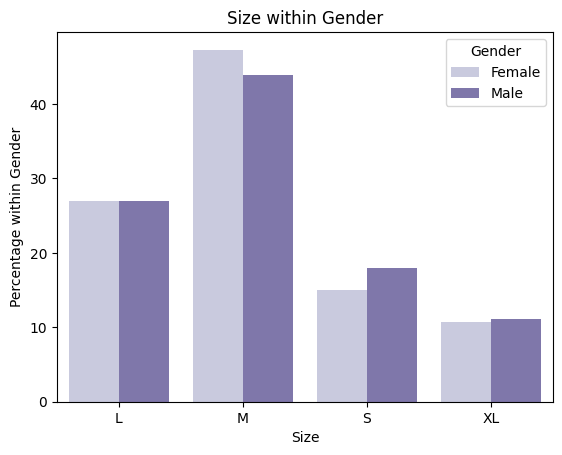

In [141]:
grouped = df.groupby(['Gender', 'Size']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('Gender')['Count'].transform(lambda x: x / x.sum() * 100)

# Построение графика
sns.barplot(
    x='Size',
    y='Percent',
    hue='Gender',
    data=grouped,
    palette='Purples'
)

# Настройка осей
plt.ylabel('Percentage within Gender')
plt.title('Size within Gender')
plt.show()

Гипотеза не подтвердилась. Мужчины чаще заказывают одежду размера S, чем женщины.

### Гипотеза: Женщины чаще заказывают "женские" товары, чем мужчины. 

In [77]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [78]:
woman_items = ['Blouse','Handbag', 'Jewelry','Dress', 'Skirt']

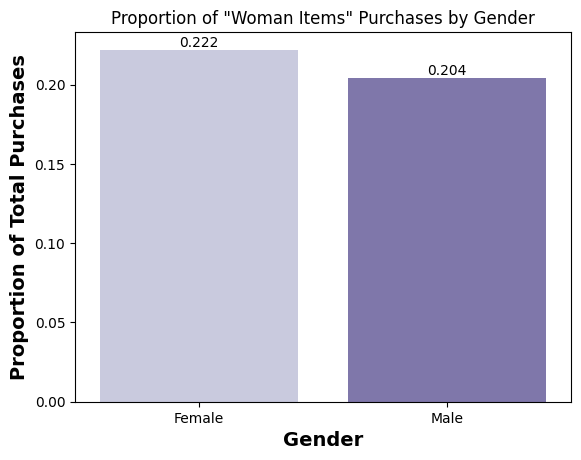

In [140]:
df['Woman Items'] = df['Item Purchased'].apply(lambda x: 'Yes' if x in woman_items else 'No')

woman_items_by_gender = df[df['Woman Items'] == 'Yes'].groupby('Gender').size()

total_purchases_by_gender = df.groupby('Gender').size()
gender_proportions = (woman_items_by_gender / total_purchases_by_gender).fillna(0)

sns.barplot(gender_proportions, palette='Purples')
for index, value in enumerate(gender_proportions):
    plt.text(index, value, f'{value:,.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Proportion of "Woman Items" Purchases by Gender')
plt.ylabel('Proportion of Total Purchases',weight = 'bold', fontsize=14)
plt.xlabel('Gender',weight = 'bold', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Гипотеза подтвердилась. Женщины действительно больше мужчин покупают женские" товары.

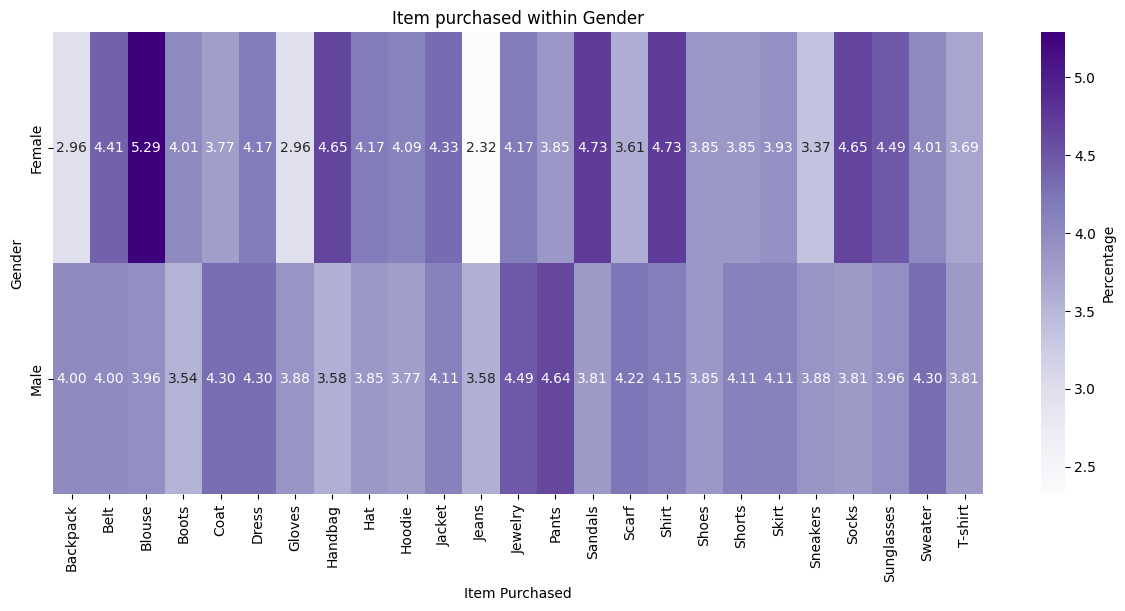

In [139]:
pivot_table = df.pivot_table(
    index = 'Gender',
    columns = 'Item Purchased',
    values = 'Customer ID',
    aggfunc = 'count')

percent = pivot_table.div(pivot_table.sum(axis=1), axis=0)*100

plt.figure(figsize = (15,6))
sns.heatmap(percent, annot=True, cmap = 'Purples', fmt ='.2f', cbar_kws={'label':'Percentage'})
plt.title('Item purchased within Gender')
plt.show()

Самыми продаваемыми товарами среди женщин являются: блузки, сандали и рубашки. 
Среди мужчин: штаны и украшения

### Гипотеза: верхняя одежда в среднем стоит дороже остальных категорий

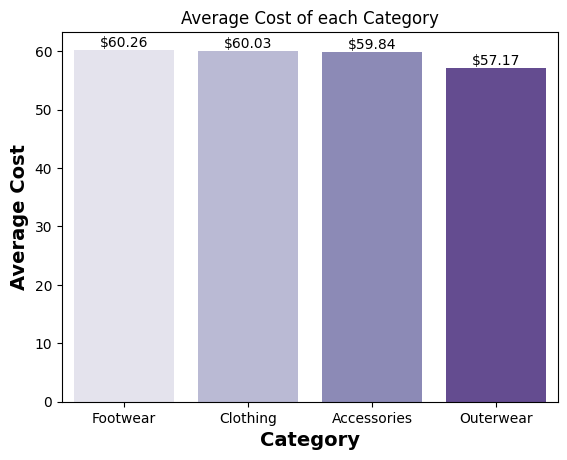

In [87]:
category_means = df.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False)
sns.barplot(category_means, palette='Purples')

for index, value in enumerate(category_means):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Category',weight = 'bold', fontsize=14)
plt.ylabel('Average Cost',weight = 'bold', fontsize=14)
plt.title('Average Cost of each Category')
plt.show()


На графике видно, что средняя стоимость верхней одежды ниже средней стоимости других категорий. Однако в целом можно сказать, что средняя стоимость различных категорий распределена равномерно.

### Гипотезы о цветах

Гипотеза 1: женщины предпочитают заказывать одежду ярких цветов

Гипотеза 2: мужчины предпочитают заказывать одежду темных цветов

Гипотеза 3: мужчины чаще женщин заказывают одежду темных оттенков

In [123]:
color_groups = {
    'Gray': 'Dark', 'Maroon': 'Dark', 'Charcoal': 'Dark', 'Black': 'Dark',
    'Brown': 'Dark', 'Olive': 'Dark', 'Indigo': 'Dark',
    
    
    'White': 'Light', 'Silver': 'Light', 'Lavender': 'Light', 'Beige': 'Light',
    'Peach': 'Light', 'Yellow': 'Light',

    
    'Turquoise': 'Bright', 'Pink': 'Bright', 'Purple': 'Bright', 'Gold': 'Bright',
    'Violet': 'Bright', 'Teal': 'Bright', 'Green': 'Bright', 'Red': 'Bright',
    'Cyan': 'Bright', 'Orange': 'Bright', 'Magenta': 'Bright', 'Blue': 'Bright'}

df['Color Group'] = df['Color'].map(color_groups)


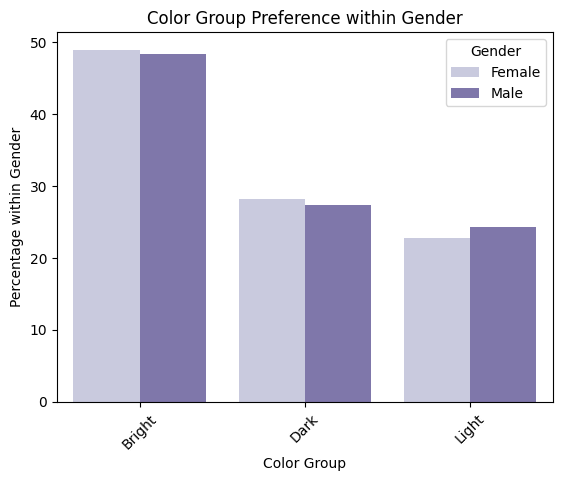

In [137]:
#df_filtered = df.loc[df['Age_Type']=='Adult']

grouped = df.loc[df['Category']=='Clothing'].groupby(['Gender', 'Color Group']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('Gender')['Count'].transform(lambda x: x / x.sum() * 100)
#plt.figure(figsize = (15,6))

sns.barplot(
    x='Color Group',
    y='Percent',
    hue='Gender',
    data=grouped,
    palette='Purples'
)
plt.ylabel('Percentage within Gender')
plt.title('Color Group Preference within Gender')
plt.xticks(rotation=45)
plt.show()

Гипотеза 1 подтвердилась. Женщины действительно заказывают яркую одежду чаще всего.
Гипотезы 2 и 3 не подтвердились. Мужчины так же предпочитают яркую одежду и заказывают темную меньше женщин.

Можно построить и другие гипотезы о цветовых предпочтениях различных возрастных групп, проверить которые можно при помощи слеюущих графиков:

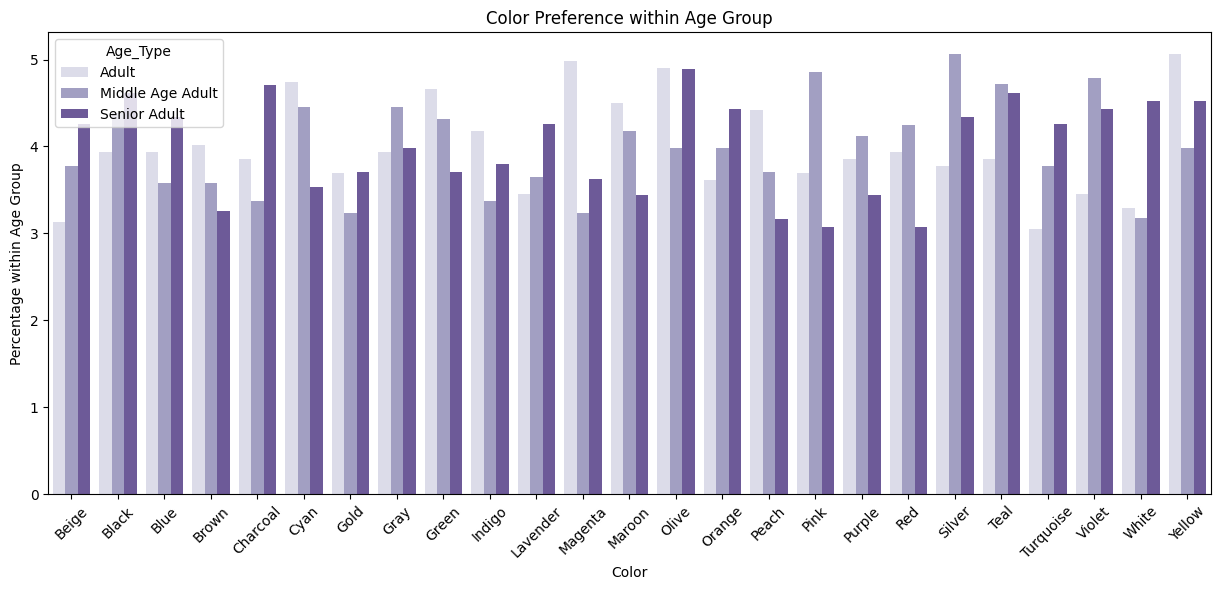

In [138]:
grouped = df.groupby(['Age_Type', 'Color']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('Age_Type')['Count'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize = (15,6))
# Построение графика
sns.barplot(
    x='Color',
    y='Percent',
    hue='Age_Type',
    data=grouped,
    palette='Purples'
)

# Настройка осей
plt.ylabel('Percentage within Age Group')
plt.title('Color Preference within Age Group')
plt.xticks(rotation=45)
plt.show()

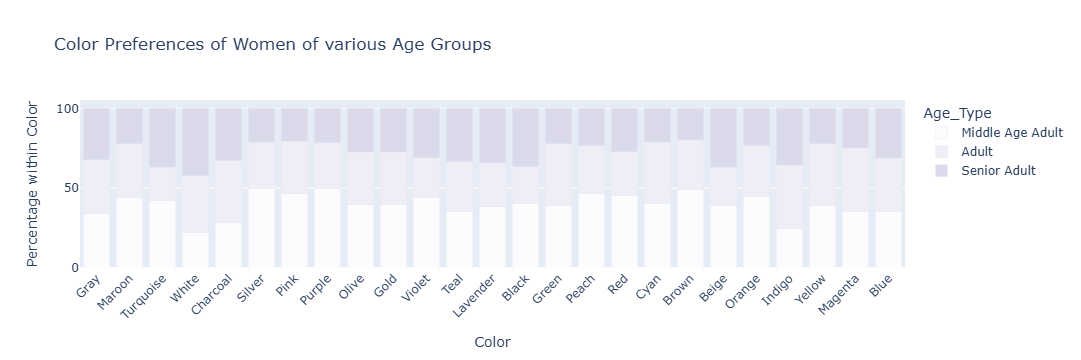

In [147]:
grouped = df.loc[df['Gender']=='Female'].groupby(['Age_Type', 'Color']).size().reset_index(name='Count')

age_types = df['Age_Type'].unique()
colors = df['Color'].unique()

all_combinations = pd.MultiIndex.from_product([age_types, colors], names=['Age_Type', 'Color'])

full_data = grouped.set_index(['Age_Type', 'Color']).reindex(all_combinations, fill_value=0).reset_index()

full_data['Percent'] = full_data.groupby('Color')['Count'].transform(lambda x: x / x.sum() * 100)

fig = px.bar(
    full_data,
    x='Color',
    y='Percent',
    color='Age_Type',
    title='Color Preferences of Women of various Age Groups',
    labels={'Percent': 'Percentage'},
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.Purples
)

fig.update_layout(
    xaxis_title='Color',
    yaxis_title='Percentage within Color',
    xaxis_tickangle=-45
)

fig.show()

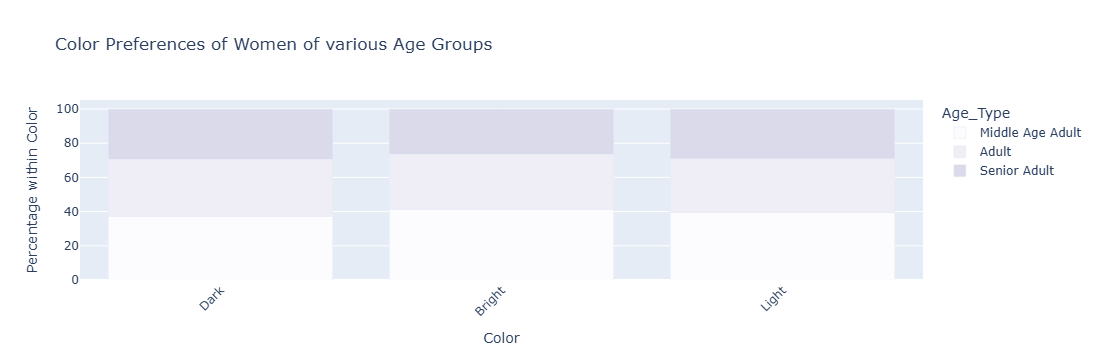

In [148]:
grouped = df.loc[df['Gender']=='Female'].groupby(['Age_Type', 'Color Group']).size().reset_index(name='Count')

age_types = df['Age_Type'].unique()
colors = df['Color Group'].unique()

all_combinations = pd.MultiIndex.from_product([age_types, colors], names=['Age_Type', 'Color Group'])

full_data = grouped.set_index(['Age_Type', 'Color Group']).reindex(all_combinations, fill_value=0).reset_index()

full_data['Percent'] = full_data.groupby('Color Group')['Count'].transform(lambda x: x / x.sum() * 100)

fig = px.bar(
    full_data,
    x='Color Group',
    y='Percent',
    color='Age_Type',
    title='Color Preferences of Women of various Age Groups',
    labels={'Percent': 'Percentage'},
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.Purples
)

fig.update_layout(
    xaxis_title='Color',
    yaxis_title='Percentage within Color',
    xaxis_tickangle=-45
)

fig.show()

### Гипотеза: в холодных регионах количество заказов теплых вещей (прим. куртки, пальто) выше, чем в теплых регионах

In [149]:
region_mapping = {
    "Alabama": "Warm", "Arizona": "Warm", "Arkansas": "Warm", "Florida": "Warm", "Georgia": "Warm",
    "Hawaii": "Warm", "Louisiana": "Warm", "Mississippi": "Warm", "New Mexico": "Warm", "Nevada": "Warm",
    "North Carolina": "Warm", "Oklahoma": "Warm", "South Carolina": "Warm", "Texas": "Warm",
    "Tennessee": "Warm", "Virginia": "Warm",


    "California": "Moderate", "Colorado": "Moderate", "Delaware": "Moderate", "Illinois": "Moderate",
    "Indiana": "Moderate", "Kansas": "Moderate", "Kentucky": "Moderate", "Maryland": "Moderate",
    "Missouri": "Moderate", "Ohio": "Moderate", "Oregon": "Moderate", "Pennsylvania": "Moderate",
    "Washington": "Moderate", "West Virginia": "Moderate",

    "Alaska": "Cold", "Connecticut": "Cold", "Idaho": "Cold", "Iowa": "Cold", "Maine": "Cold",
    "Massachusetts": "Cold", "Michigan": "Cold", "Minnesota": "Cold", "Montana": "Cold",
    "Nebraska": "Cold", "New Hampshire": "Cold", "New Jersey": "Cold", "New York": "Cold",
    "North Dakota": "Cold", "Rhode Island": "Cold", "South Dakota": "Cold", "Utah": "Cold",
    "Vermont": "Cold", "Wisconsin": "Cold", "Wyoming": "Cold"
}

df['Climate Region']=  df['Location'].map(region_mapping)



In [150]:
warm_clothes = ['Coat','Jacket', 'Hat', 'Scarf', 'Gloves' ]

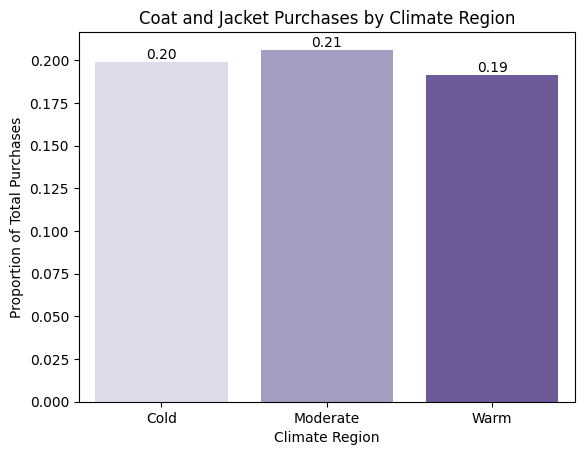

In [152]:
df['Warm Items'] = df['Item Purchased'].apply(lambda x: 'Yes' if x in warm_clothes else 'No')

coat_purchases_by_region = df[df['Warm Items'] == 'Yes'].groupby('Climate Region').size()

total_purchases_by_region = df.groupby('Climate Region').size()
coat_proportions = (coat_purchases_by_region / total_purchases_by_region).fillna(0)

sns.barplot(coat_proportions, palette='Purples')
for index, value in enumerate(coat_proportions):
    plt.text(index, value, f'{value:,.2f}', ha='center', va='bottom', fontsize=10)
plt.title('Coat and Jacket Purchases by Climate Region')
plt.ylabel('Proportion of Total Purchases')
plt.xlabel('Climate Region')
plt.xticks(rotation=0)
plt.show()

Судя по графику теплые вещи больше всего заказываются в регионах с умеренным климатом, за ними следуют холодные регионы, а далее теплые. Утверждение о том, что теплые вещи больше всего заказываются в холодных регионах, не подтвердилось, однако можно наглядно убедиться в том, что в теплых регионах теплые вещи не так актуальны.

### Гипотеза: в теплых регионах количество заказов летних вещей (прим. юбки, солнцезащитные очки) выше, чем в холодных регионах

In [153]:
summer_clothes = ['Sandals', 'Shorts', 'Dress', 'Skirt','Sunglasses' ]

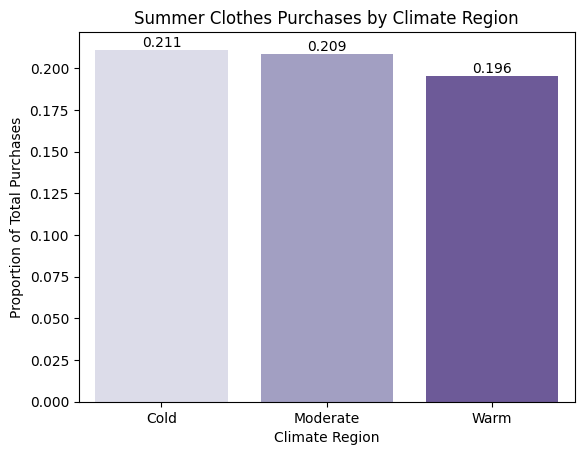

In [155]:
df['Summer Items'] = df['Item Purchased'].apply(lambda x: 'Yes' if x in summer_clothes else 'No')

summer_purchases_by_region = df[df['Summer Items'] == 'Yes'].groupby('Climate Region').size()

total_purchases_by_region = df.groupby('Climate Region').size()
summer_proportions = (summer_purchases_by_region / total_purchases_by_region).fillna(0)

sns.barplot(summer_proportions, palette='Purples')
for index, value in enumerate(summer_proportions):
    plt.text(index, value, f'{value:,.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Summer Clothes Purchases by Climate Region')
plt.ylabel('Proportion of Total Purchases')
plt.xlabel('Climate Region')
plt.xticks(rotation=0)
plt.show()

Гипотеза снова не подтвердилась, и летние вещи чаще продаются в холодных регионах.

### Гипотеза: Летние вещи чаще продаются весной и летом

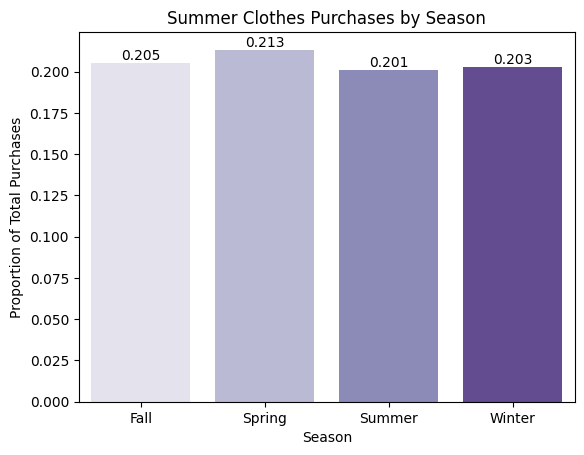

In [157]:
summer_purchases_by_region = df[df['Summer Items'] == 'Yes'].groupby('Season').size()

total_purchases_by_region = df.groupby('Season').size()
summer_proportions = (summer_purchases_by_region / total_purchases_by_region).fillna(0)
sns.barplot(summer_proportions, palette='Purples')
for index, value in enumerate(summer_proportions):
    plt.text(index, value, f'{value:,.3f}', ha='center', va='bottom', fontsize=10)
plt.title('Summer Clothes Purchases by Season')
plt.ylabel('Proportion of Total Purchases')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.show()

Гипотеза подтвердилась частично: весной самые высокие продажи летних вещей, летом они продаются хуже всего.

### Гипотеза: Теплые вещи чаще продаются осенью и зимой

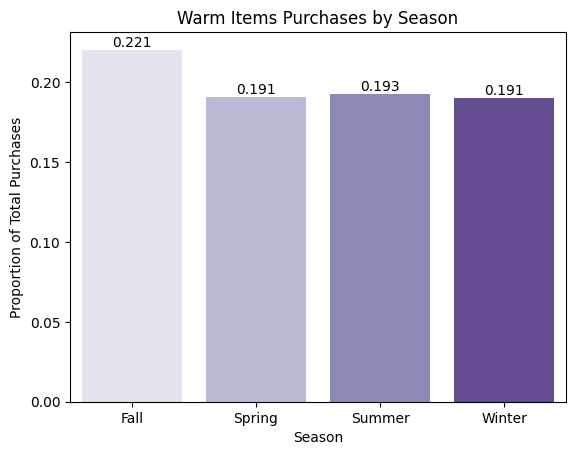

In [158]:
coat_purchases_by_region = df[df['Warm Items'] == 'Yes'].groupby('Season').size()

total_purchases_by_region = df.groupby('Season').size()
coat_proportions = (coat_purchases_by_region / total_purchases_by_region).fillna(0)

sns.barplot(coat_proportions, palette='Purples')
for index, value in enumerate(coat_proportions):
    plt.text(index, value, f'{value:,.3f}', ha='center', va='bottom', fontsize=10)
plt.title('Warm Items Purchases by Season')
plt.ylabel('Proportion of Total Purchases')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.show()

Гипотеза подтвердилась частично: осенью самые высокие продажи теплых вещей, зимой они продаются хуже, чем летом.

### Гипотеза: Клиенты с подпиской чаще пользуются скидками, чем клиенты без подписки

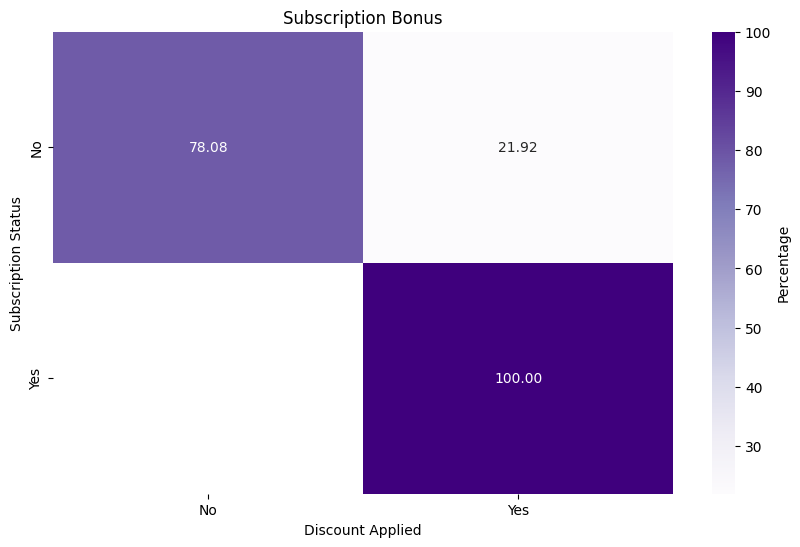

In [162]:
pivot_table = df.pivot_table(
    index = 'Subscription Status',
    columns = 'Discount Applied',
    values = 'Customer ID',
    aggfunc = 'count')

percent = pivot_table.div(pivot_table.sum(axis=1), axis=0)*100

plt.figure(figsize = (10,6))
sns.heatmap(percent, annot=True, cmap = 'Purples', fmt ='.2f', cbar_kws={'label':'Percentage'})
plt.title('Subscription Bonus')
plt.show()

Гипотеза подтвердилась. Кроме того, можно сделать вывод, что подписка автоматически дает своим клиентам скидку, в то время как клиенты без подписки пользуются скидками только в 20% случаев

### Клиенты с подпиской чаще могут позволить себе экспресс-доставку

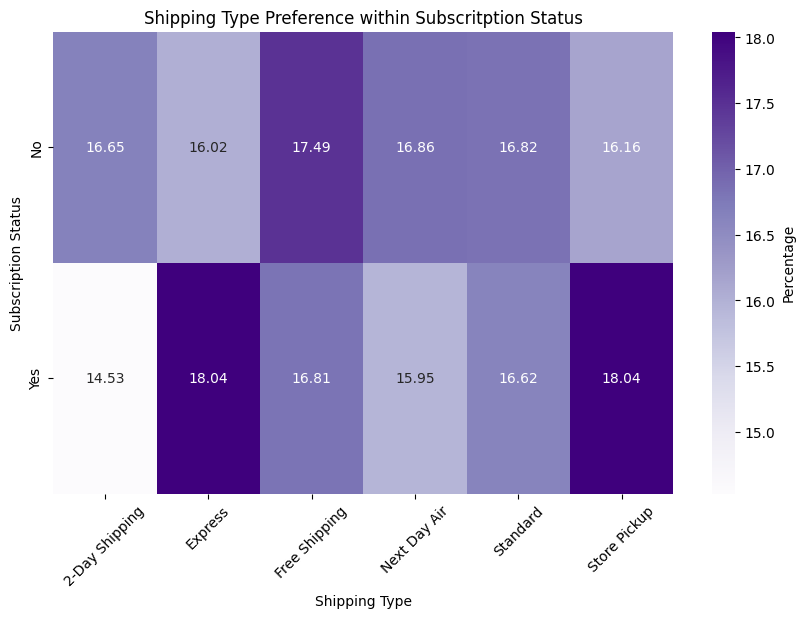

In [171]:
pivot_table = df.pivot_table(
    index = 'Subscription Status',
    columns = 'Shipping Type',
    values = 'Customer ID',
    aggfunc = 'count')

percent = pivot_table.div(pivot_table.sum(axis=1), axis=0)*100

plt.figure(figsize = (10,6))
sns.heatmap(percent, annot=True, cmap = 'Purples', fmt ='.2f', cbar_kws={'label':'Percentage'})
plt.title('Shipping Type Preference within Subscritption Status')
plt.xticks(rotation=45)
plt.show()

Гипотеза подтвердилась. Клиенты с подпиской действительно чаще всего предпочитают экспресс доставку, в то время как клиенты без подписки выбирают беспатную доставку

### Гипотеза: более дорогие товары получают лучшую оценку о покупателей

Text(0.5, 1.0, 'Purchase Amount - Rating Correlation')

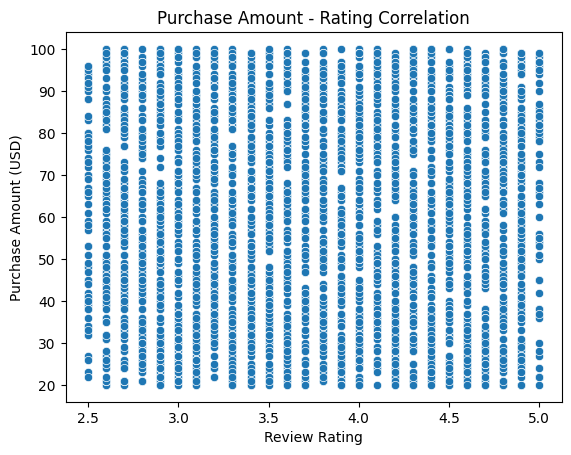

In [173]:
sns.scatterplot(data=df, x='Review Rating', y='Purchase Amount (USD)')
plt.title('Purchase Amount - Rating Correlation')

Гипотеза не подтвердилась. Связи между ценой и оценкой нет

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

### найдите самый популярный товар

In [178]:
item_stats = df.groupby('Item Purchased').agg({
    'Customer ID': 'count', 
    'Review Rating': 'mean'    
}).rename(columns={'Customer ID': 'Order Count', 'Review Rating': 'Average Rating'})
most_popular_by_orders = item_stats['Order Count'].idxmax()
most_popular_by_orders_count = item_stats.loc[most_popular_by_orders, 'Order Count']

most_popular_by_rating = item_stats['Average Rating'].idxmax()
most_popular_by_rating_value = item_stats.loc[most_popular_by_rating, 'Average Rating']

print("Самый популярный товар по заказам:", most_popular_by_orders, "с количеством заказов:", most_popular_by_orders_count)
print("Самый популярный товар по рейтингу:", most_popular_by_rating, "со средним рейтингом:", most_popular_by_rating_value)


Самый популярный товар по заказам: Blouse с количеством заказов: 171
Самый популярный товар по рейтингу: Gloves со средним рейтингом: 3.8642857142857143


### постройте распределение покупателей по полу

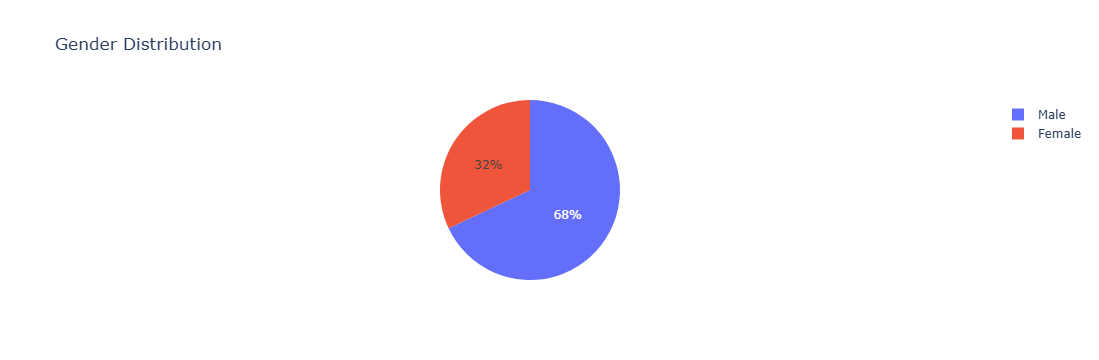

In [199]:
fig = go.Figure()
fig.add_trace(go.Pie(values=df['Gender'].value_counts(), labels=df['Gender'].unique()))
fig.update_layout(title='Gender Distribution')
fig.show()

### определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

In [179]:
total_spent_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
purchase_count_by_gender = df['Gender'].value_counts()
avg_price_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()

print("Общая сумма покупок по полу:")
print(total_spent_by_gender)
print("\nКоличество покупок по полу:")
print(purchase_count_by_gender)
print("\nСредняя стоимость покупки по полу:")
print(avg_price_by_gender)

Общая сумма покупок по полу:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

Количество покупок по полу:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Средняя стоимость покупки по полу:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


Мужчины заказывают чаще, соответсвенно общая сумма их заказов больше, однако средняя сумма покупки больше у женщин.

In [181]:
grouped = df.groupby('Gender')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).reset_index()
grouped

Gender     sum  count       mean
0  Female   75191   1248  60.249199
1    Male  157890   2652  59.536199

In [183]:
total_spent_by_gender = df.groupby('Age_Type')['Purchase Amount (USD)'].sum().sort_values(ascending= False).reset_index().iloc[0]
purchase_count_by_gender = df['Age_Type'].value_counts().sort_values(ascending= False).reset_index().iloc[0]
avg_price_by_gender =df.groupby('Age_Type')['Purchase Amount (USD)'].mean().sort_values(ascending= False).reset_index().iloc[0]
print("Общая сумма покупок по полу:")
print(total_spent_by_gender)
print("\nКоличество покупок по полу:")
print(purchase_count_by_gender)
print("\nСредняя стоимость покупки по полу:")
print(avg_price_by_gender)

Общая сумма покупок по полу:
Age_Type                 Middle Age Adult
Purchase Amount (USD)               88853
Name: 0, dtype: object

Количество покупок по полу:
Age_Type    Middle Age Adult
count                   1482
Name: 0, dtype: object

Средняя стоимость покупки по полу:
Age_Type                     Adult
Purchase Amount (USD)    60.155145
Name: 0, dtype: object


Люди среднего возраста заказывают чаще, соответсвенно общая сумма их заказов больше, однако средняя сумма покупки больше у молодежи.

In [185]:
grouped = df.groupby('Age_Type')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).sort_values(by=['sum', 'count', 'mean'])
grouped

sum  count       mean
Age_Type                                 
Senior Adult      65256   1105  59.055204
Adult             74833   1244  60.155145
Middle Age Adult  88853   1482  59.954791

### определите, есть ли зависимость между цветом одежды и сезоном.

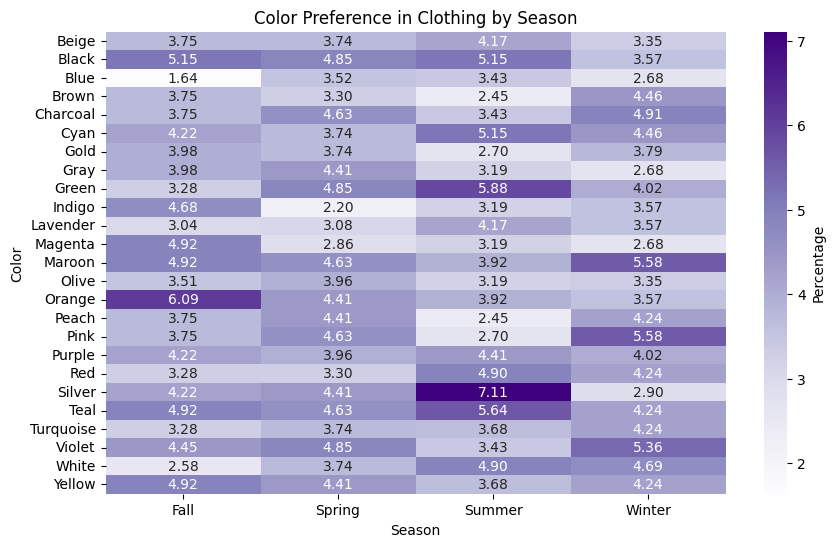

In [205]:
pivot_table = df.loc[df['Category']=='Clothing'].pivot_table(
    index = 'Color',
    columns = 'Season',
    values = 'Customer ID',
    aggfunc = 'count')

percent = pivot_table.div(pivot_table.sum(axis=0), axis=1)*100

plt.figure(figsize = (10,6))
sns.heatmap(percent, annot=True, cmap = 'Purples', fmt ='.2f', cbar_kws={'label':'Percentage'})
plt.title('Color Preference in Clothing by Season')
plt.show()

Осенью предпочитают оранжевый цвет. Весной нет ярко выраженного лидера. Летом очень популярны серебристый и зеленый. А зимой люди отдают предпочтение каштановому и розовому

### посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.

In [208]:
seasonal_mau = data.groupby('Season')['Customer ID'].nunique().reset_index()
seasonal_mau.columns = ['Season', 'MAU']
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_mau['Season'] = pd.Categorical(seasonal_mau['Season'], categories=season_order, ordered=True)
seasonal_mau = seasonal_mau.sort_values('Season')

# Вычисляем динамику MAU (в %)
seasonal_mau['MAU Change (%)'] = seasonal_mau['MAU'].pct_change() * 100
seasonal_mau

Season  MAU  MAU Change (%)
3  Winter  971             NaN
1  Spring  999        2.883625
2  Summer  955       -4.404404
0    Fall  975        2.094241

### найдите самую популярную букву в названии одежды.

In [212]:
df_filtered = df.loc[df['Category']=='Clothing']
text = ''.join(df_filtered['Item Purchased']).lower()
letter_count = {}
for char in text:
    letter_count[char] = letter_count.get(char, 0) + 1

print('Словарь с буквами: ', letter_count)
max_key = max(letter_count, key=letter_count.get)
print('Самая популярная буква в названии одежды: ', max_key)  # Результат: 'c'

Словарь с буквами:  {'b': 171, 'l': 171, 'o': 789, 'u': 171, 's': 2068, 'e': 940, 'w': 164, 'a': 459, 't': 1113, 'r': 961, 'j': 124, 'n': 295, 'h': 624, 'i': 625, 'd': 317, 'k': 317, 'p': 171, '-': 147, 'c': 159}
Самая популярная буква в названии одежды:  s


<h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [12]:
data_alc = pd.read_csv('drinks.csv')
df_alc = data_alc.copy()

In [13]:
df_alc.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9

Было бы интересно посмотреть распределение упоотребления алкоголя по континентам, но так как в датасете нет такого параметра, а разделять вручную 193 страны слишком сложно, можно построить карту для быстрого визуального анализа.

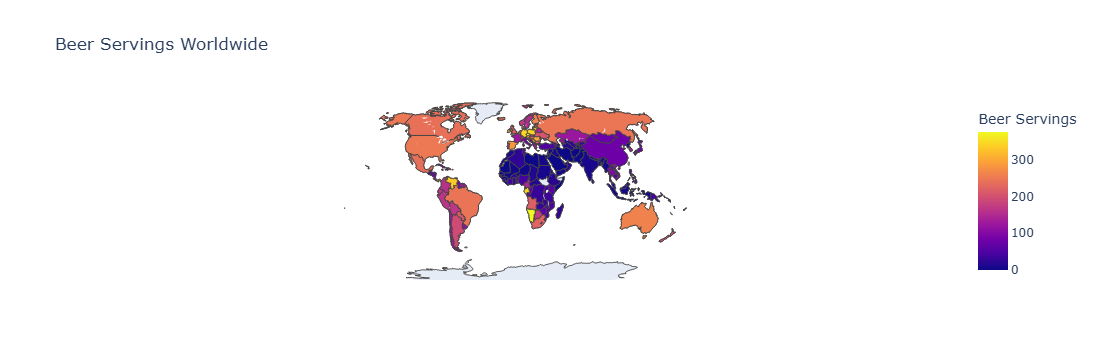

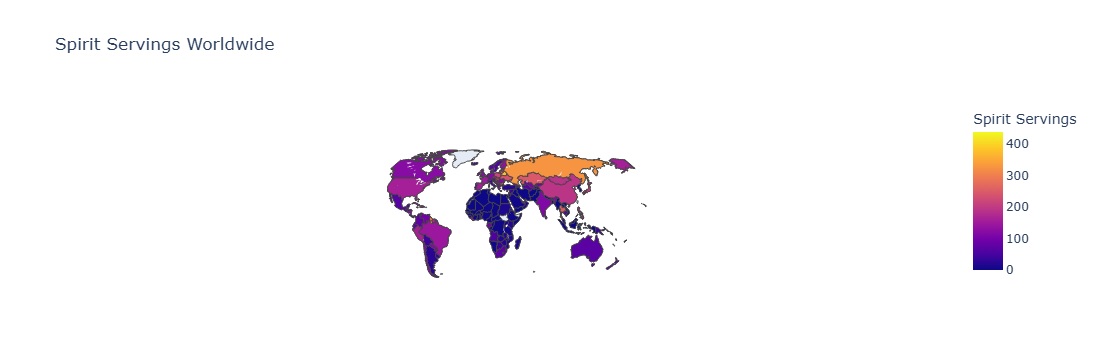

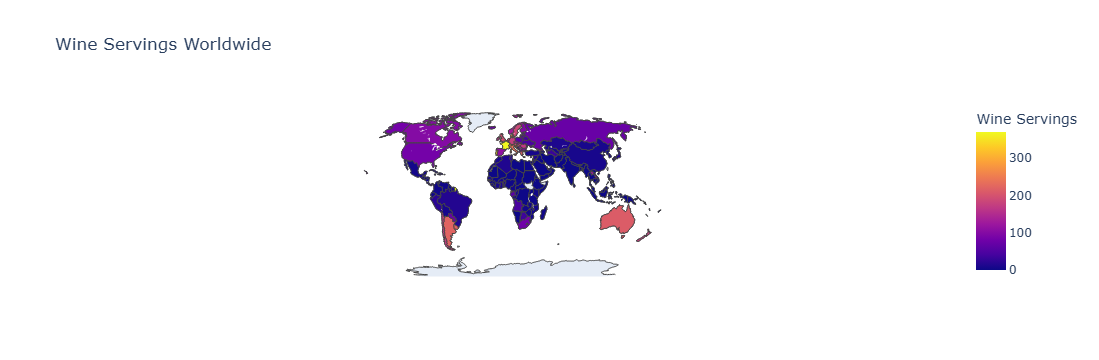

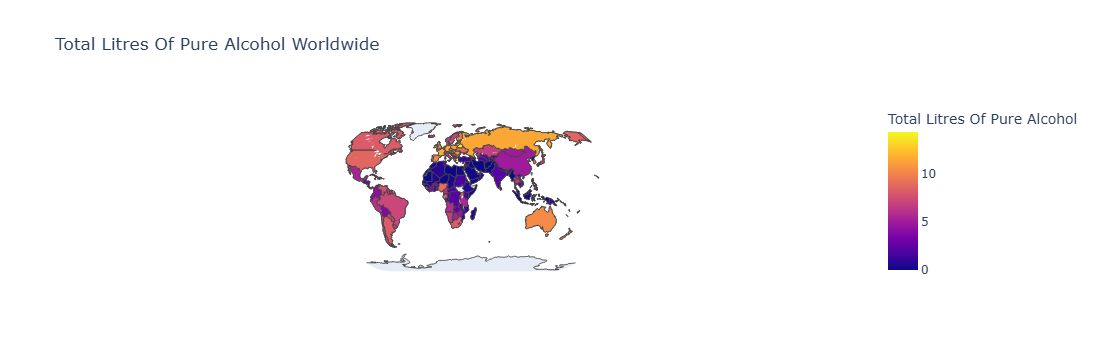

In [37]:
init_notebook_mode(connected=True)

# Функция для отрисовки карты
def plot_choropleth(dataframe, column, title):

    choromap = go.Figure(
        data=go.Choropleth(
            locations=dataframe['country'],  
            locationmode='country names',   
            z=dataframe[column],           
            text=dataframe['country'],     
            colorbar_title=f'{column.replace("_", " ").title()}',  
        ),
        layout=go.Layout(
            title=title,  
            geo=dict(
                showframe=False,
                projection_type='natural earth'  
            )
        )
    )
    # Отображение карты
    iplot(choromap)
drinks = df_alc.columns[1:]
for drink in drinks:
    plot_choropleth(df_alc,  column=drink,  title=drink.replace("_", " ").title()+' Worldwide')


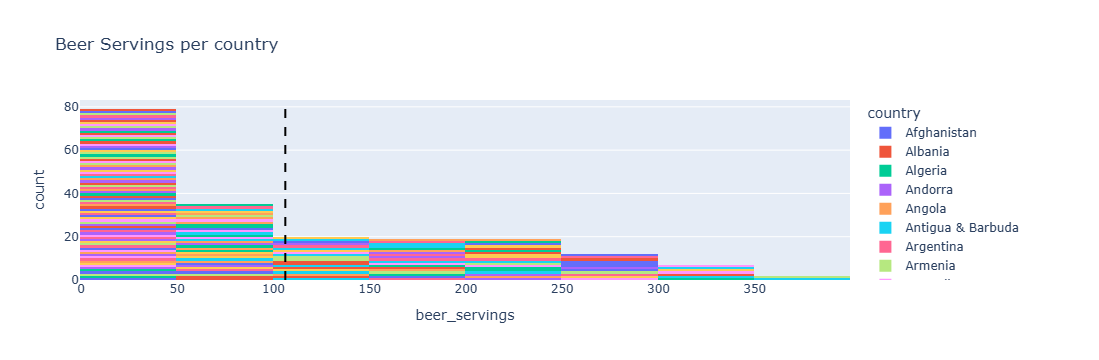

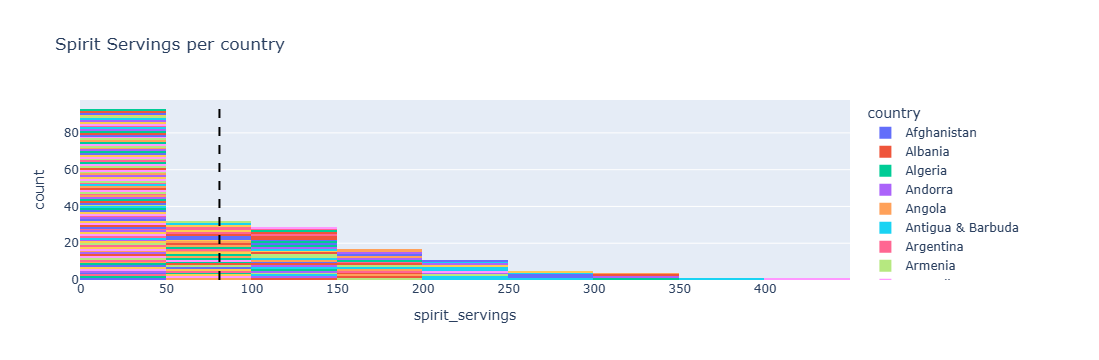

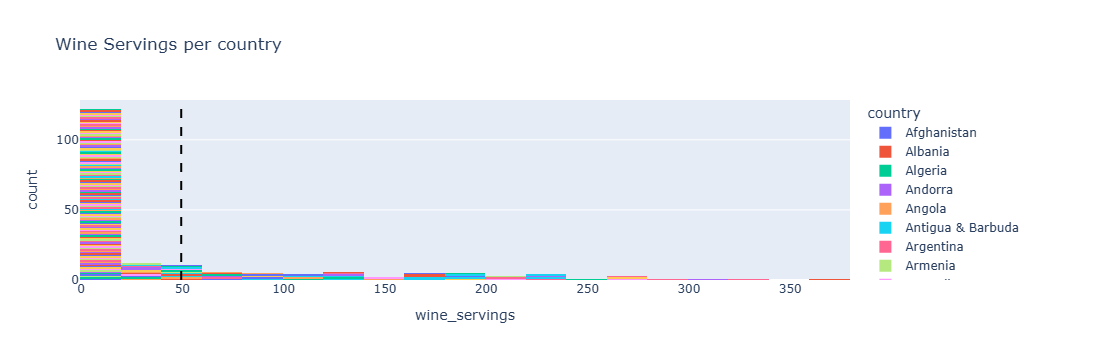

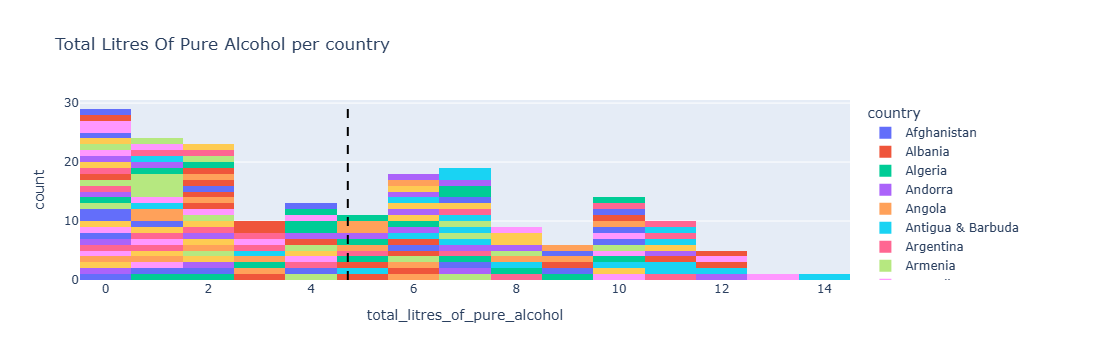

In [135]:
for drink in drinks:
    fig = px.histogram(df_alc, drink,
                       color="country",
                       title=f'{drink.replace("_", " ").title()} per country')
    fig.add_vline(x=df_alc[drink].mean(), line_width=2, line_dash="dash", line_color="black")
    
    fig.show()


Частота употребления пива:
       country  beer_servings
       Namibia            376
Czech Republic            361
         Gabon            347
       Germany            346
     Lithuania            343
        Poland            343
     Venezuela            333
       Ireland            313
         Palau            306
       Romania            297


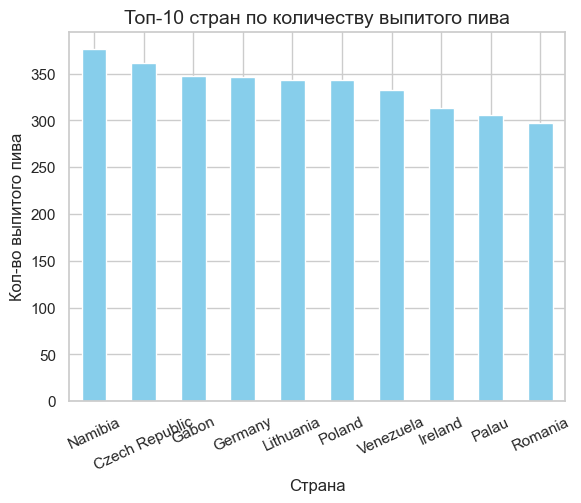

In [162]:
print("\nЧастота употребления пива:")
print(df_alc[['country', 'beer_servings']].sort_values('beer_servings', ascending = False).head(10).to_string(index=False))

df_alc[['country', 'beer_servings']].sort_values('beer_servings', ascending = False).head(10).plot(
    kind='bar', color='skyblue', x='country', y='beer_servings', legend=False)

plt.title('Топ-10 стран по количеству выпитого пива', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Кол-во выпитого пива', fontsize=12)
plt.xticks(rotation=25)
plt.show()


Частота употребления вина:
          country  wine_servings
           France            370
         Portugal            339
          Andorra            312
      Switzerland            280
          Denmark            278
         Slovenia            276
       Luxembourg            271
          Croatia            254
            Italy            237
Equatorial Guinea            233


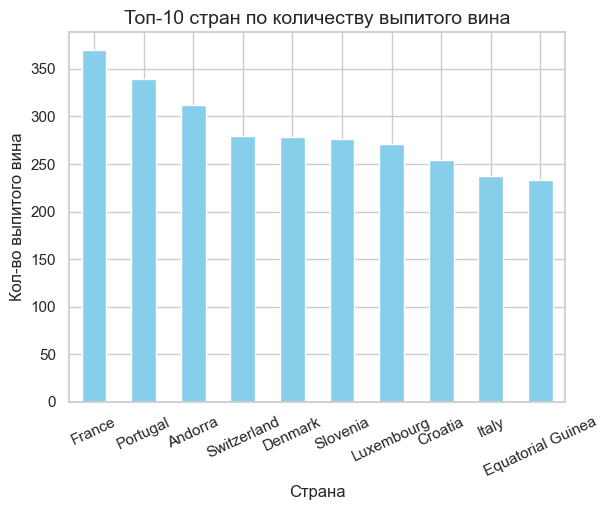

In [163]:
print("\nЧастота употребления вина:")
print(df_alc[['country', 'wine_servings']].sort_values('wine_servings', ascending = False).head(10).tail(10).to_string(index=False))

df_alc[['country', 'wine_servings']].sort_values('wine_servings', ascending = False).head(10).tail(10).plot(
    kind='bar', color='skyblue', x='country', y='wine_servings', legend=False)

plt.title('Топ-10 стран по количеству выпитого вина', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Кол-во выпитого вина', fontsize=12)
plt.xticks(rotation=25)
plt.show()


Частота употребления крепкого алкоголя:
           country  spirit_servings
           Grenada              438
           Belarus              373
             Haiti              326
Russian Federation              326
         St. Lucia              315
            Guyana              302
          Slovakia              293
          Dominica              286
          Thailand              258
      Cook Islands              254


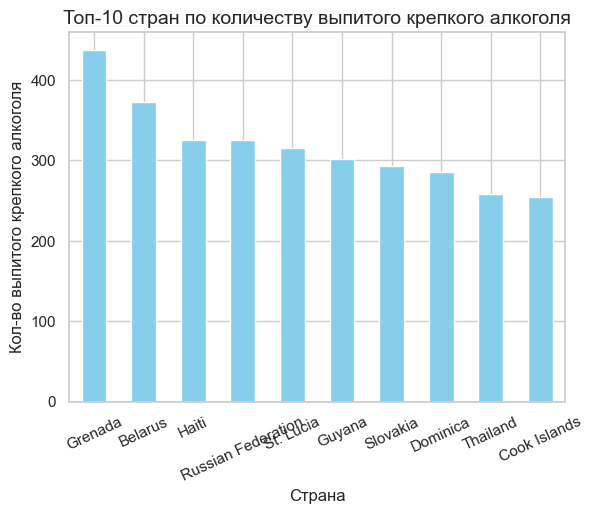

In [164]:
print("\nЧастота употребления крепкого алкоголя:")
print(df_alc[['country', 'spirit_servings']].sort_values('spirit_servings', ascending = False).head(10).tail(10).to_string(index=False))

df_alc[['country', 'spirit_servings']].sort_values('spirit_servings', ascending = False).head(10).tail(10).plot(
    kind='bar', color='skyblue', x='country', y='spirit_servings', legend=False)

plt.title('Топ-10 стран по количеству выпитого крепкого алкоголя', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Кол-во выпитого крепкого алкоголя', fontsize=12)
plt.xticks(rotation=25)
plt.show()

Beer Servings:
Чехия и Германи занимают ожидаемо высокие места по употреблению пива, что связано с популярностью пивной культуры в этих странах. 
Помимо всего прочего, эти страны занимают лидирующие места по производству пива в мире.
Намибия же лидирует по употреблению пива, что объясняется исторически. Намибия была колонией Германии, и до сих пор большАя часть населения Намибии - немцы.

Spirit Servings:
Гренада выделяется высоким потреблением крепкого алкоголя, что может быть связано с традициями и предпочтениями местного населения. Страна выделяется своей традицией производства и потребления рома, что связано с его историей сахарной промышленности.
Употребление алкоголя в Беларуси и Российской Федерации, особенно крепких напитков (таких как водка), является частью культурных традиций. Алкоголь часто употребляется в социальных и семейных мероприятиях. Климат также играет роль: в холодных странах алкоголь иногда воспринимается как способ согревания.

Wine Servings:
Франция, Португалия, Андорра ожидаемо лидируют по потреблению вина, что объясняется культурой виноделия и традициями употребления вина.
Также если посмотреть на карту, можно заметить, что в целом в Европе довольно популярно вино, что связано с подходящим климатом, большими плантациями и развитым производством винных изделий. Также Австралия, Чили и Аргентина выделяются на карте мира, также известные своими винами

Также глядя на карту мира можно отметить, что в странах западной части Азии, а также большой части Африки, потребление алкоголя находится на очень низком или даже нулевом уровне, что можно связать с религиозными причинами.

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [214]:
df_tarantino = pd.read_csv('tarantino.csv')

df_tarantino.head()

movie  type      word  minutes_in
0  Reservoir Dogs  word      dick        0.40
1  Reservoir Dogs  word     dicks        0.43
2  Reservoir Dogs  word    fucked        0.55
3  Reservoir Dogs  word   fucking        0.61
4  Reservoir Dogs  word  bullshit        0.61

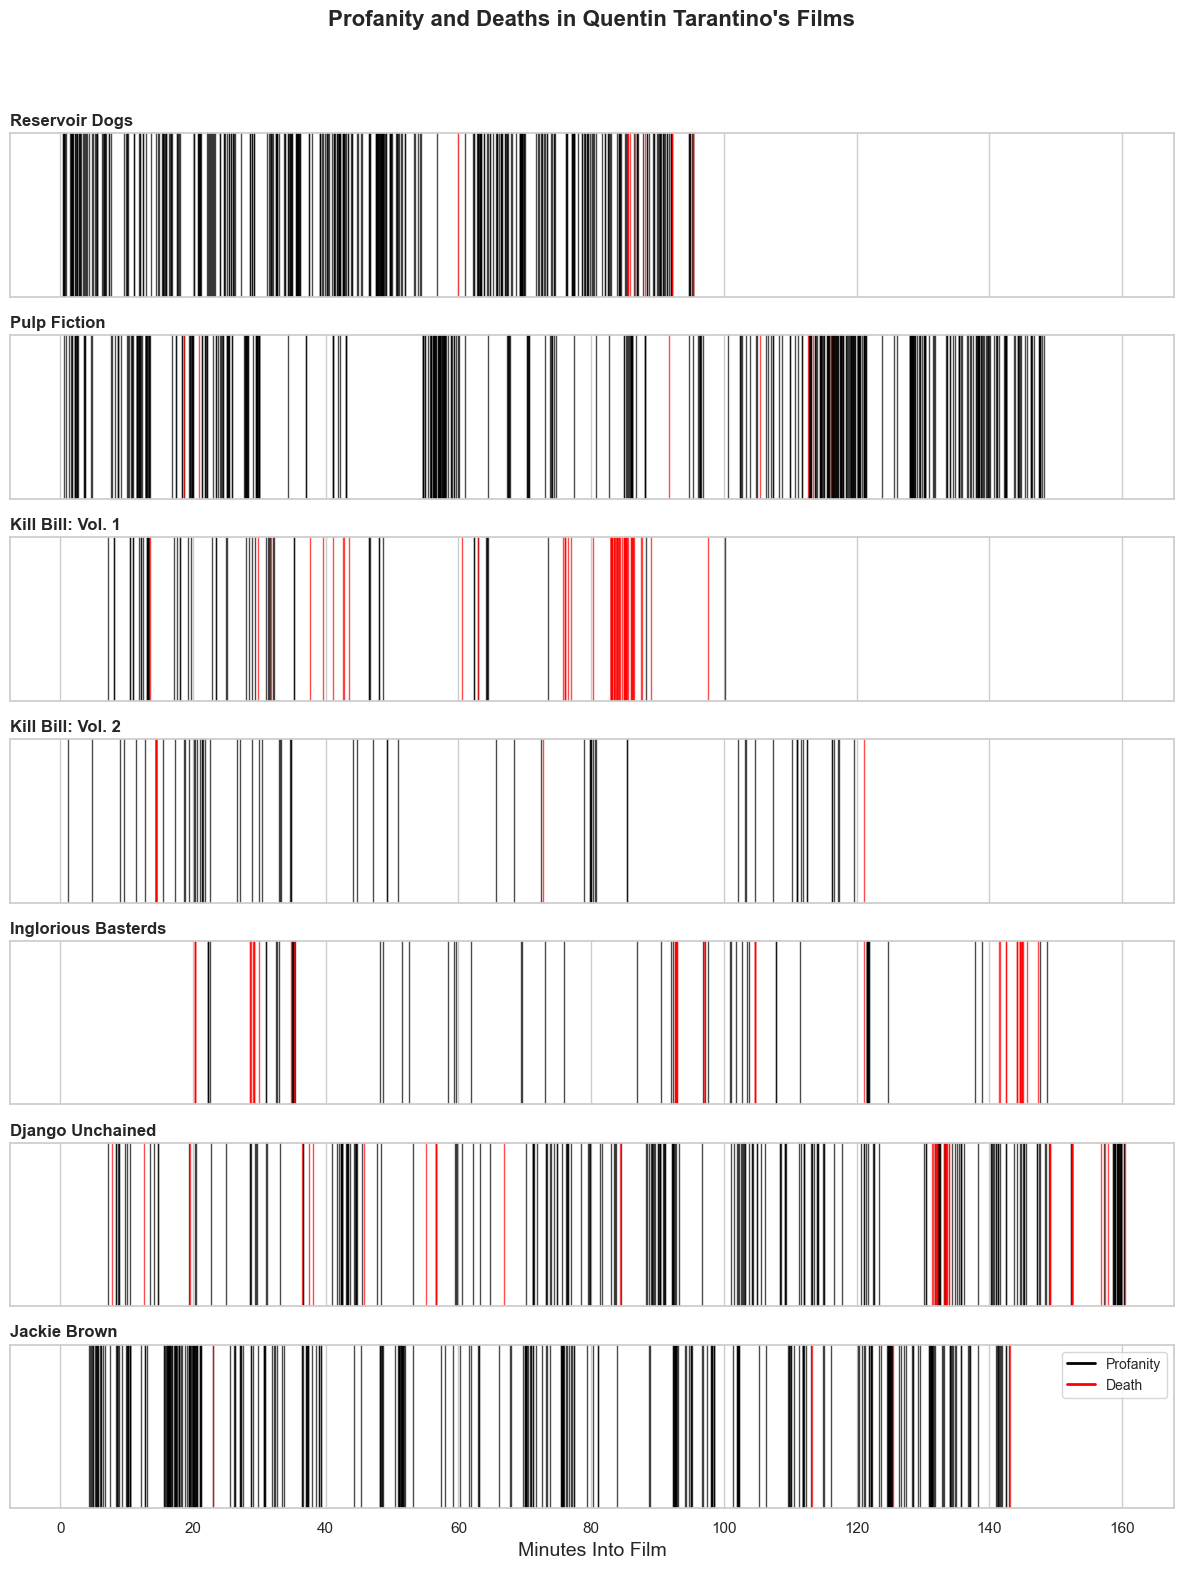

In [216]:
from matplotlib.lines import Line2D
sns.set(style="whitegrid")

# Фильтруем данные для ненормативной лексики и смертей
profanity = df_tarantino[df_tarantino['type'] == 'word']
deaths = df_tarantino[df_tarantino['type'] == 'death']

movies = df_tarantino['movie'].unique()
fig, axes = plt.subplots(len(movies), 1, figsize=(12, 16), sharex=True)

for i, movie in enumerate(movies):
    profanity_data = profanity[profanity['movie'] == movie]
    death_data = deaths[deaths['movie'] == movie]
    
    for time in profanity_data['minutes_in']:
        axes[i].axvline(x=time, color='black', lw=1, alpha=0.7)

    for time in death_data['minutes_in']:
        axes[i].axvline(x=time, color='red', lw=1, alpha=0.7)

    axes[i].set_title(movie, loc='left', fontsize=12, fontweight='bold')
    axes[i].set_yticks([])  

plt.xlabel("Minutes Into Film", fontsize=14)
plt.suptitle("Profanity and Deaths in Quentin Tarantino's Films", 
             fontsize=16, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Profanity'),
    Line2D([0], [0], color='red', lw=2, label='Death')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## 1. Число проклятий, летальных исходов и их соотношение по фильмам

In [224]:
profanity = df_tarantino[df_tarantino['type'] == 'word']
deaths = df_tarantino[df_tarantino['type'] == 'death']

profanity_counts = profanity.groupby('movie').size()
death_counts = deaths.groupby('movie').size()

ratio = (profanity_counts / death_counts).fillna(0)
ratio2 = (death_counts / profanity_counts).fillna(0)

print("Число проклятий по фильмам:")
print(profanity_counts)
print("\nЧисло летальных исходов по фильмам:")
print(death_counts)
print("\nСоотношение проклятий к смертям по фильмам:")
print(ratio)
print("\nСоотношение смертей к проклятиям по фильмам:")
print(ratio2)

Число проклятий по фильмам:
movie
Django Unchained       262
Inglorious Basterds     58
Jackie Brown           368
Kill Bill: Vol. 1       57
Kill Bill: Vol. 2       69
Pulp Fiction           469
Reservoir Dogs         421
dtype: int64

Число летальных исходов по фильмам:
movie
Django Unchained       47
Inglorious Basterds    48
Jackie Brown            4
Kill Bill: Vol. 1      63
Kill Bill: Vol. 2      11
Pulp Fiction            7
Reservoir Dogs         10
dtype: int64

Соотношение проклятий к смертям по фильмам:
movie
Django Unchained        5.574468
Inglorious Basterds     1.208333
Jackie Brown           92.000000
Kill Bill: Vol. 1       0.904762
Kill Bill: Vol. 2       6.272727
Pulp Fiction           67.000000
Reservoir Dogs         42.100000
dtype: float64

Соотношение смертей к проклятиям по фильмам:
movie
Django Unchained       0.179389
Inglorious Basterds    0.827586
Jackie Brown           0.010870
Kill Bill: Vol. 1      1.105263
Kill Bill: Vol. 2      0.159420
Pulp Fiction     

Самый богатый на ругательства фильм: Криминальное чтиво, кол-во смертей в нем: 7. Таким образом соотношение проклятий к смертям в этом фильме: 67:1
Меньше всего ругательств было употреблено в фильме Убить Билла 1. Однако кол-во смертей в нем даже больше, чем кол-во проклятий, что соответсвует действительности, так как в фильме довольно мало диалогов и много экшн-сцен

## 2. Частота употребления конкретных проклятий

Топ-10 проклятий и частота их употребления: 
word
fucking         407
shit            221
fuck            213
n-word          179
ass             140
goddamn         113
motherfucker     70
bitch            64
hell             45
damn             37
Name: count, dtype: int64


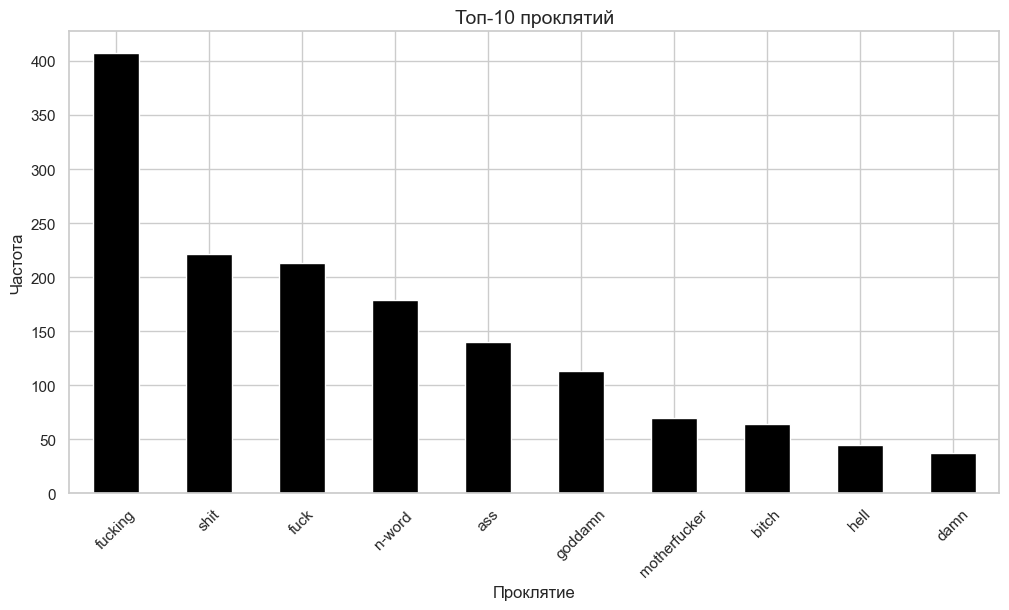

In [221]:
profanity_frequency = profanity['word'].value_counts()

print("Топ-10 проклятий и частота их употребления: ")
print(profanity_frequency.head(10))

plt.figure(figsize=(12, 6))
profanity_frequency.head(10).plot(kind='bar', color='black')
plt.title('Топ-10 проклятий', fontsize=14)
plt.xlabel('Проклятие', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 3. Распределение времени между проклятиями

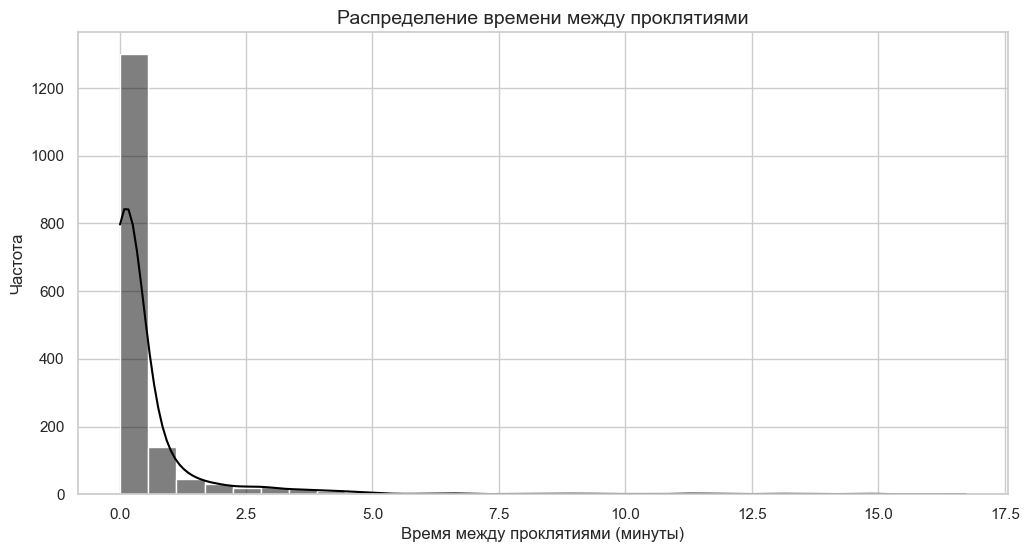

In [222]:
profanity['time_diff'] = profanity.groupby('movie')['minutes_in'].diff()
time_diff = profanity[profanity['time_diff'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(time_diff['time_diff'], kde=True, color='black', bins=30)
plt.title('Распределение времени между проклятиями', fontsize=14)
plt.xlabel('Время между проклятиями (минуты)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

Исходя из графика, можно сделать вывод, что в фильмах Тарантино, нецензурную брань используют почти каждую минуту